Pick a large volume document of your choice and create a corpus/dictionary using appropriate packages and find
-    Similarities of at least 20 tokens
-    Plot 2D graph to see words similarity of at least 20 words
###### Submission Deadline :  21-08-2020 (Friday) End of the day

In [1]:
# !pip install gensim
# !pip install nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

import nltk, re, string, random
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [3]:
# Friends - TV Show (Wikipedia)
text = open("Friends - TV Show (Wikipedia).txt", 'r').read()

In [4]:
text = re.sub(r'\d+', ' ', text)
text = re.sub(r'\s+', ' ', text)
text = text.lower()
text

'ï»¿friends is an american television sitcom, created by david crane and marta kauffman, which aired on nbc from september , , to may , , lasting ten seasons.[ ] with an ensemble cast starring jennifer aniston, courteney cox, lisa kudrow, matt leblanc, matthew perry and david schwimmer, the show revolves around six friends in their s and s who live in manhattan, new york city. the series was produced by bright/kauffman/crane productions, in association with warner bros. television. the original executive producers were kevin s. bright, kauffman, and crane. kauffman and crane began developing friends under the title insomnia cafe between november and december . they presented the idea to bright, and together they pitched a seven-page treatment of the show to nbc. after several script rewrites and changes, including title changes to six of one[ ] and friends like us, the series was finally named friends.[ ] filming took place at warner bros. studios in burbank, california. all ten season

In [5]:
sentences = nltk.sent_tokenize(text)
sentences

['ï»¿friends is an american television sitcom, created by david crane and marta kauffman, which aired on nbc from september , , to may , , lasting ten seasons.',
 '[ ] with an ensemble cast starring jennifer aniston, courteney cox, lisa kudrow, matt leblanc, matthew perry and david schwimmer, the show revolves around six friends in their s and s who live in manhattan, new york city.',
 'the series was produced by bright/kauffman/crane productions, in association with warner bros. television.',
 'the original executive producers were kevin s. bright, kauffman, and crane.',
 'kauffman and crane began developing friends under the title insomnia cafe between november and december .',
 'they presented the idea to bright, and together they pitched a seven-page treatment of the show to nbc.',
 'after several script rewrites and changes, including title changes to six of one[ ] and friends like us, the series was finally named friends.',
 '[ ] filming took place at warner bros. studios in burb

In [6]:
for i in range(0, len(sentences)):
    sentences[i] = sentences[i].translate(str.maketrans("","", string.punctuation)).replace("  ","")

In [7]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [8]:
for i in range(0, len(sent_word)):
    sent_word[i] = [word for word in sent_word[i] if word not in stopwords.words('english')]

In [9]:
model = Word2Vec(sent_word, min_count=1)
words = model.wv.vocab

In [10]:
vector = model.wv['crane']
vector

array([ 3.7081121e-03, -2.1072512e-03, -3.2395500e-04, -3.0899495e-03,
       -6.6764111e-04, -5.6022373e-03,  2.3000326e-03, -6.2685027e-03,
       -1.9701495e-04, -3.5613931e-03, -2.3980492e-03, -4.9025624e-04,
       -3.0429247e-03, -3.1999161e-04,  5.2037596e-04, -2.0914599e-03,
       -3.3081316e-03,  2.7185597e-03, -4.2579472e-03,  4.1670604e-03,
       -3.4162193e-04, -4.0438846e-03, -1.4389552e-03, -5.6288717e-03,
       -2.6170793e-03, -5.4357913e-03,  1.6016226e-03, -5.9597269e-03,
        4.7207284e-03,  1.5022944e-03,  3.7574493e-03,  8.4360497e-04,
       -3.6938160e-03, -4.4899532e-03, -1.5572392e-03, -5.0017862e-03,
        1.6910995e-03,  2.3962476e-03, -1.1279623e-03, -1.7697439e-03,
       -4.4533419e-03, -8.7424688e-04,  3.5363270e-03, -1.3015177e-03,
       -2.5471209e-03,  4.2043873e-03,  1.6494123e-03,  2.1375667e-03,
        2.1787109e-03, -9.4376900e-04, -4.0825219e-03, -3.6857608e-03,
       -2.0687433e-03, -3.4933609e-03,  2.0003112e-04, -3.1178026e-03,
      

In [11]:
all_words = [word for words in sent_word for word in words if word not in string.punctuation]

In [12]:
vocab = random.sample(all_words, 20)
vocab

['cheery',
 'set',
 'lauded',
 'ross',
 'city',
 'kevin',
 'financial',
 'series',
 'produced',
 'course',
 'season',
 'back',
 'members',
 'becomes',
 'erica',
 'mostwatched',
 'casting',
 'carol',
 'hates',
 'relationship']

In [13]:
print('Similarity >>\n')
for i in range(len(vocab)-1):
    print(vocab[i], '&', vocab[i+1], '::', model.wv.similarity(w1=vocab[i], w2=vocab[i+1]))

Similarity >>

cheery & set :: 0.05882366
set & lauded :: -0.0066215787
lauded & ross :: 0.065659225
ross & city :: 0.0012747124
city & kevin :: -0.09026256
kevin & financial :: -0.061568335
financial & series :: 0.110571936
series & produced :: 0.11300348
produced & course :: 0.102068886
course & season :: -0.066953585
season & back :: 0.20721897
back & members :: -0.04571989
members & becomes :: 0.1533446
becomes & erica :: 0.030175306
erica & mostwatched :: -0.21410227
mostwatched & casting :: 0.052542053
casting & carol :: 0.11059978
carol & hates :: 0.07246082
hates & relationship :: 0.035658162


In [14]:
model.wv.doesnt_match(vocab)

'produced'

In [15]:
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,6)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

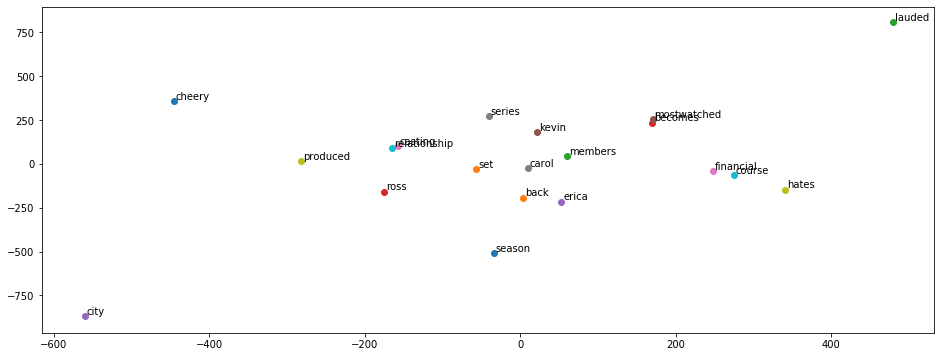

In [16]:
tsne_plot(model)